In [3]:
from ultralytics import SAM
import torch
import tifffile as tf
import matplotlib.pyplot as plt 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de: {device}")

Utilisation de: cuda


In [4]:
image = tf.imread('../data/Romane_Martin_urne_sature_10-4.tif')

In [5]:
print(image.shape)
print(image)

(1735, 1808, 1595)
[[[37 37 35 ... 37 37 37]
  [36 37 36 ... 37 37 36]
  [36 37 36 ... 36 36 36]
  ...
  [37 39 39 ... 39 38 37]
  [38 40 39 ... 38 38 38]
  [38 39 38 ... 38 38 37]]

 [[37 37 36 ... 37 37 36]
  [37 37 37 ... 37 36 36]
  [36 37 37 ... 36 36 36]
  ...
  [38 39 39 ... 38 37 37]
  [39 39 38 ... 39 38 37]
  [39 38 37 ... 39 39 38]]

 [[36 37 36 ... 37 37 36]
  [36 37 37 ... 37 35 35]
  [36 37 37 ... 37 36 36]
  ...
  [38 39 39 ... 38 36 36]
  [38 38 38 ... 39 38 36]
  [38 38 38 ... 39 39 37]]

 ...

 [[47 45 43 ... 42 42 41]
  [44 45 43 ... 42 40 40]
  [46 45 44 ... 39 39 41]
  ...
  [38 40 39 ... 35 34 35]
  [38 39 38 ... 39 33 35]
  [40 40 39 ... 41 37 34]]

 [[45 44 43 ... 42 43 40]
  [43 44 42 ... 41 39 40]
  [46 46 45 ... 39 40 42]
  ...
  [38 40 38 ... 35 35 37]
  [40 38 38 ... 37 33 37]
  [40 38 38 ... 41 35 33]]

 [[46 45 42 ... 42 43 41]
  [46 46 46 ... 43 41 41]
  [47 47 48 ... 42 42 43]
  ...
  [39 40 38 ... 37 34 35]
  [40 39 37 ... 39 36 35]
  [39 37 37 ... 41 

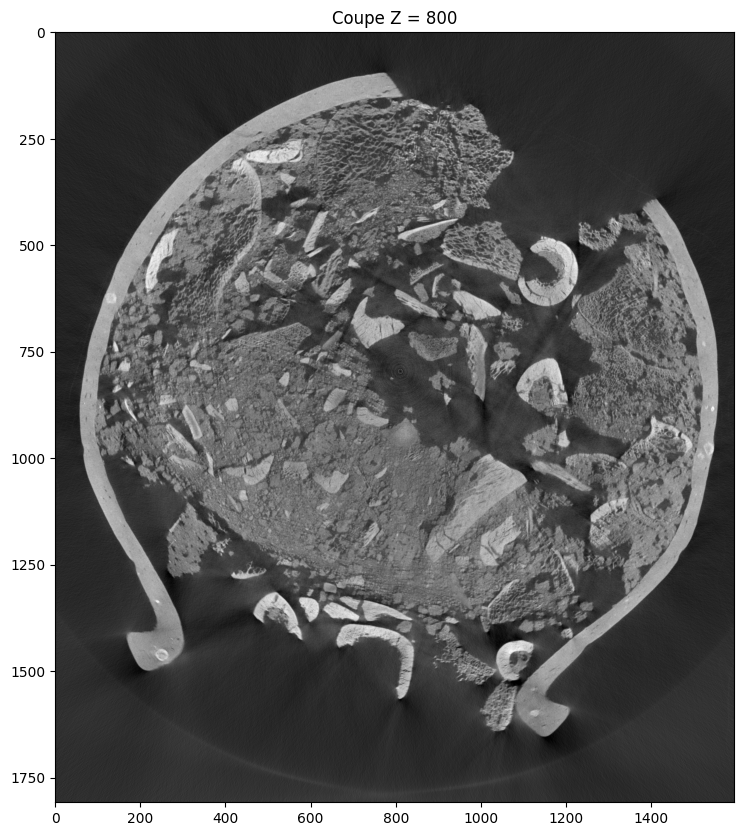

In [6]:
plt.figure(figsize=(12, 10))
plt.imshow(image[800, :, :],cmap='gray')
plt.title('Coupe Z = 800')
plt.imsave('coupez800.png', image[800, :, :], cmap='gray')
plt.show()

In [7]:
# Load a model
model = SAM("sam_b.pt")

# Display model information (optional)
model.info()

Model summary: 173 layers, 93,735,472 parameters, 93,735,472 gradients


(173, 93735472, 93735472, 0.0)

In [10]:
result = model("coupez800.png")
result[0].show()



image 1/1 /home/oelalaouiel/travail/funeria/FUNERIA-omar/notebooks/coupez800.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 39, 1 40, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 49, 1 50, 1 51, 1 52, 1 53, 1 54, 1 55, 1 56, 1 57, 1 58, 1 59, 1 60, 6223.5ms
Speed: 5.7ms preprocess, 6223.5ms inference, 10.5ms postprocess per image at shape (1, 3, 1024, 1024)


In [16]:
print(result[0].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60.],
       device='cuda:0')
conf: tensor([0.9786, 0.9707, 0.9639, 0.9628, 0.9627, 0.9621, 0.9616, 0.9596, 0.9562, 0.9548, 0.9492, 0.9468, 0.9461, 0.9457, 0.9445, 0.9444, 0.9440, 0.9438, 0.9437, 0.9436, 0.9428, 0.9427, 0.9422, 0.9417, 0.9399, 0.9377, 0.9373, 0.9342, 0.9300, 0.9292, 0.9292, 0.9284, 0.9272, 0.9262, 0.9260, 0.9255, 0.9183, 0.9171, 0.9155,
        0.9145, 0.9135, 0.9134, 0.9119, 0.9107, 0.9103, 0.9102, 0.9095, 0.9090, 0.9089, 0.9089, 0.9076, 0.9050, 0.9010, 0.9003, 0.8987, 0.8930, 0.8924, 0.8921, 0.8874, 0.8849, 0.8832], device='cuda:0')
data: tensor([[9.0577e+02, 4.4494e+02, 1.0947e+03, 5.8266e+02, 9.7865e-